In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


In [2]:
dtq42023 = pd.read_csv('Copy of RD&D Scorecard Feedback 2023-2024 Raw Data - Q4 - 2023.csv')
dtq42023

,Candidate Name,Job,Requisition ID,Department,Current Status,Stage,Interview,Scheduled,Submitted,Interviewer,Outcome
0,Federico Aballay,Senior Data Engineer LATAM,Evergreen - Senior Data Engineer LATAM,Data,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),11/14/2023,11/14/2023,Fanny Ibarra,Yes
1,Ali Ahmadian,Senior iOS Engineer (Mobile) - LATAM,Evergreen - LatAm Senior Mobile Eng,Engineering - GoFundMe,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,12/15/2023,Sofiene Afif (Contractor),No
2,Gonzalo Albornoz,Senior Staff Machine Learning Engineer LATAM,Evergreen - Machine Learning Engineer LATAM,Data,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,11/14/2023,Fanny Ibarra,Yes
3,Maria Camila Aldana Guerrero,Senior Business Intelligence Analyst (LatAm),Evergreen - LatAm BI Analyst,Business Operations,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,11/06/2023,Fanny Ibarra,No
4,Matias Altamirano,Senior Data Engineer LATAM,Evergreen - Senior Data Engineer LATAM,Data,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,11/21/2023,Sofiene Afif (Contractor),Yes
...,...,...,...,...,...,...,...,...,...,...,...
158,Sebastian Virguez,Senior Business Intelligence Analyst (LatAm),Evergreen - LatAm BI Analyst,Business Operations,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,11/06/2023,Fanny Ibarra,No
159,Javier Waitzel,Senior iOS Engineer (Mobile) - LATAM,Evergreen - LatAm Senior Mobile Eng,Engineering - GoFundMe,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,12/27/2023,Sofiene Afif (Contractor),Yes
160,Maximiliano Ward,Senior iOS Engineer (Mobile) - LATAM,Evergreen - LatAm Senior Mobile Eng,Engineering - GoFundMe,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,12/15/2023,Sofiene Afif (Contractor),Yes
161,Petr Ziuzikov,Senior Business Intelligence Analyst (LatAm),Evergreen - LatAm BI Analyst,Business Operations,Rejected,Recruiter Screen,Recruiter Screen (Phone Interview),NaN,11/14/2023,Fanny Ibarra,Yes


/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_62567/4178844952.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=interviews_per_month.index.astype(str), y=interviews_per_month.values, palette='viridis')


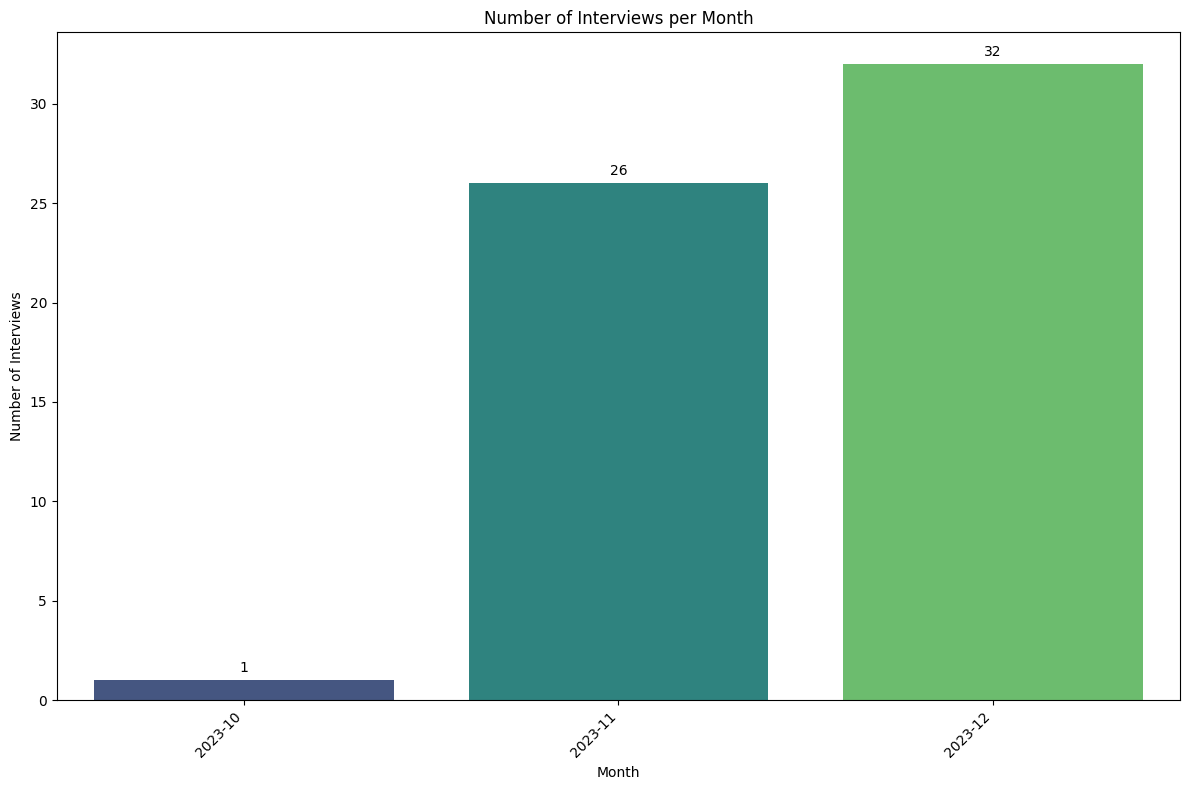

In [36]:
# Convertir la columna 'Scheduled' a formato de fecha
dtq42023['Scheduled'] = pd.to_datetime(dtq42023['Scheduled'], errors='coerce')

# Filtrar las filas con fechas válidas
valid_scheduled = dtq42023.dropna(subset=['Scheduled'])

# Agrupar por mes y contar las entrevistas
interviews_per_month = valid_scheduled['Scheduled'].dt.to_period('M').value_counts().sort_index()

# Graficar la cantidad de entrevistas por mes
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=interviews_per_month.index.astype(str), y=interviews_per_month.values, palette='viridis')
plt.title("Number of Interviews per Month")
plt.xlabel("Month")
plt.ylabel("Number of Interviews")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de entrevistas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_62567/3820173315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=interviews_by_stage.index, y=interviews_by_stage.values, palette='viridis')


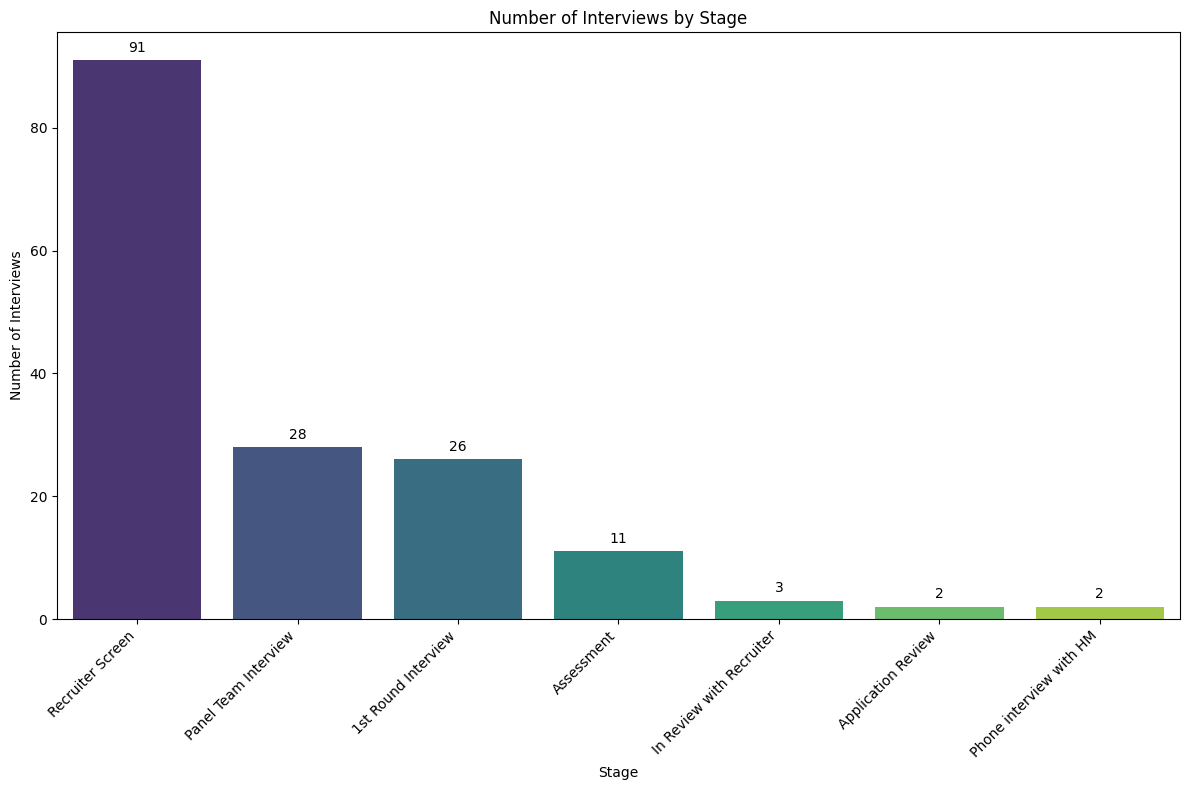

In [27]:
interviews_by_stage = dtq42023["Stage"].value_counts()
interviews_by_stage
# Crear un gráfico de barras para visualizar la cantidad de entrevistas por etapa
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=interviews_by_stage.index, y=interviews_by_stage.values, palette='viridis')
plt.title("Number of Interviews by Stage")
plt.xlabel("Stage")
plt.ylabel("Number of Interviews")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de entrevistas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [4]:
# Calcular la cantidad de entrevistas por entrevistador y trabajo
interviews_by_interviewer_and_job = dtq42023.groupby(['Interviewer', 'Job']).size().reset_index(name='Interview Count')

# Mostrar los resultados
print(interviews_by_interviewer_and_job)

                  Interviewer  \
0                   Adi Kedia   
1             Alan Leatherman   
2            Alexandra Wilson   
3            Alexandra Wilson   
4             Aliaksei Fanski   
5           Andrew De Stefano   
6           Andrew De Stefano   
7                Austin Smith   
8           Brett Vanderblock   
9           Brett Vanderblock   
10            Carly Weinstein   
11              Char De Wolfe   
12            Chelsea Hackman   
13               Eric Azoulay   
14               Fanny Ibarra   
15               Fanny Ibarra   
16               Fanny Ibarra   
17               Fanny Ibarra   
18               Fanny Ibarra   
19               Fanny Ibarra   
20               Fanny Ibarra   
21          Giancarlo Perrone   
22          Giancarlo Perrone   
23          Guiem Bosch Bosch   
24                 Jeff Haley   
25              Jigar Panchal   
26                   John Jin   
27                   Jon Tsai   
28            Jonathan Santos   
29        

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_62567/2735383888.py:2: FutureWarning: The provided callable <function sum at 0x109917d80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = interviews_by_interviewer_and_job.pivot_table(


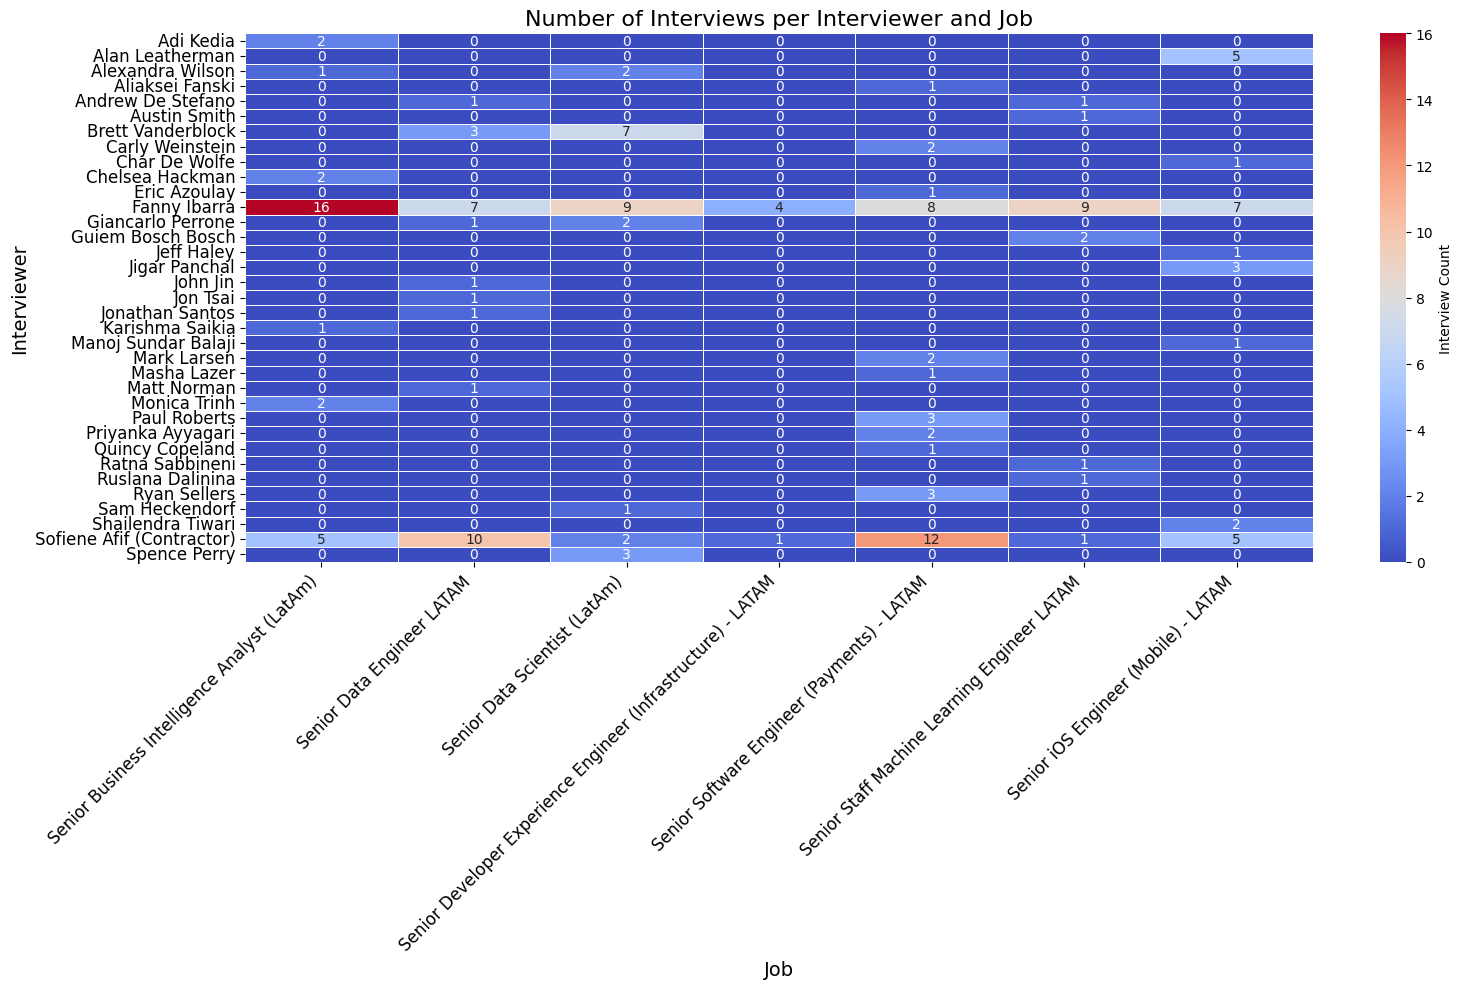

In [28]:
# Crear un gráfico de calor para visualizar las entrevistas por entrevistador y trabajo
pivot_table = interviews_by_interviewer_and_job.pivot_table(
    values='Interview Count', 
    index='Interviewer', 
    columns='Job', 
    aggfunc=np.sum, 
    fill_value=0
)

# Configuración del gráfico
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Interview Count'})
plt.title("Number of Interviews per Interviewer and Job", fontsize=16)
plt.xlabel("Job", fontsize=14)
plt.ylabel("Interviewer", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [6]:

total_interviews_by_interviewer = dtq42023['Interviewer'].value_counts().reset_index()
total_interviews_by_interviewer.columns = ['Interviewer', 'Total Interviews']
total_interviews = total_interviews_by_interviewer['Total Interviews'].sum()

# Mostrar la tabla y el total de entrevistas
print(total_interviews_by_interviewer)
print("\nTotal Interviews:", total_interviews)

# # Crear un gráfico de barras para visualizar el total de entrevistas por entrevistador
# total_interviews_by_interviewer.plot(x='Interviewer', y='Total Interviews', kind='bar', figsize=(12, 8), legend=False)
# plt.title("Total Interviews by Interviewer")
# plt.xlabel("Interviewer")
# plt.ylabel("Total Interviews")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

                  Interviewer  Total Interviews
0                Fanny Ibarra                60
1   Sofiene Afif (Contractor)                36
2           Brett Vanderblock                10
3             Alan Leatherman                 5
4                Paul Roberts                 3
5                Ryan Sellers                 3
6            Alexandra Wilson                 3
7           Giancarlo Perrone                 3
8                Spence Perry                 3
9               Jigar Panchal                 3
10                  Adi Kedia                 2
11               Monica Trinh                 2
12          Priyanka Ayyagari                 2
13          Andrew De Stefano                 2
14            Chelsea Hackman                 2
15          Shailendra Tiwari                 2
16            Carly Weinstein                 2
17          Guiem Bosch Bosch                 2
18                Mark Larsen                 2
19            Quincy Copeland           

In [24]:
# Calcular el total de entrevistas por entrevistador
total_interviews_by_interviewer = dtq42023['Interviewer'].value_counts().reset_index()
total_interviews_by_interviewer.columns = ['Interviewer', 'Total Interviews']

# Calcular el total de entrevistas
total_interviews = total_interviews_by_interviewer['Total Interviews'].sum()

# Crear una tabla más atractiva
print(tabulate(total_interviews_by_interviewer, headers='keys', tablefmt='fancy_grid'))
print(f"\nTotal Interviews: {total_interviews}")

# Guardar la tabla en un archivo CSV
directory = "/Users/milagrosvidal/GFM"
total_interviews_by_interviewer.to_csv('total_interviews_by_interviewer.csv', index=False)

╒════╤═══════════════════════════╤════════════════════╕
│    │ Interviewer               │   Total Interviews │
╞════╪═══════════════════════════╪════════════════════╡
│  0 │ Fanny Ibarra              │                 60 │
├────┼───────────────────────────┼────────────────────┤
│  1 │ Sofiene Afif (Contractor) │                 36 │
├────┼───────────────────────────┼────────────────────┤
│  2 │ Brett Vanderblock         │                 10 │
├────┼───────────────────────────┼────────────────────┤
│  3 │ Alan Leatherman           │                  5 │
├────┼───────────────────────────┼────────────────────┤
│  4 │ Paul Roberts              │                  3 │
├────┼───────────────────────────┼────────────────────┤
│  5 │ Ryan Sellers              │                  3 │
├────┼───────────────────────────┼────────────────────┤
│  6 │ Alexandra Wilson          │                  3 │
├────┼───────────────────────────┼────────────────────┤
│  7 │ Giancarlo Perrone         │              

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_62567/4019156429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Interviewer', y='Total Interviews', data=total_interviews_by_interviewer, palette='viridis')


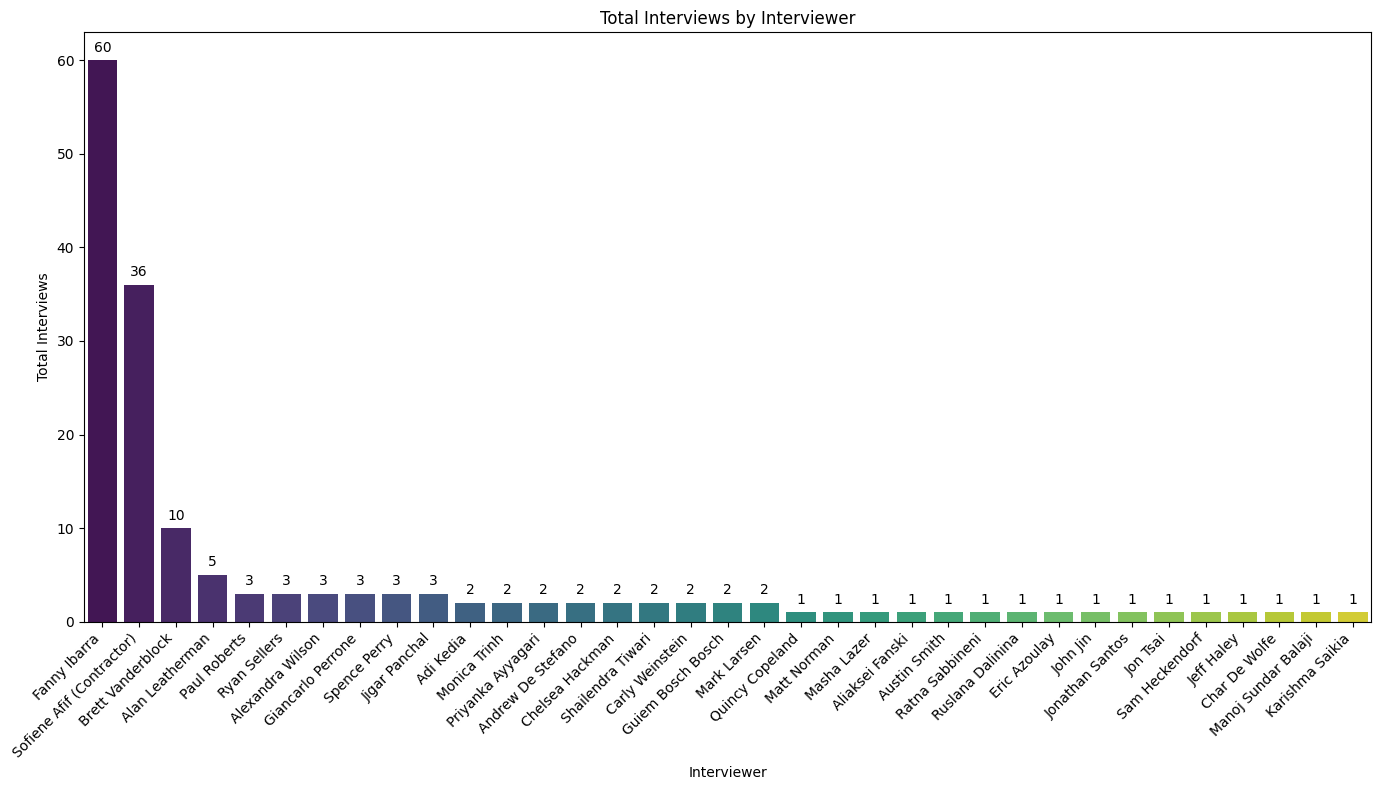

In [26]:
# Crear un gráfico de barras para visualizar el total de entrevistas por entrevistador
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Interviewer', y='Total Interviews', data=total_interviews_by_interviewer, palette='viridis')
plt.title("Total Interviews by Interviewer")
plt.xlabel("Interviewer")
plt.ylabel("Total Interviews")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de entrevistas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_62567/406006755.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Outcome', y='Count', data=outcome_counts, palette='viridis')


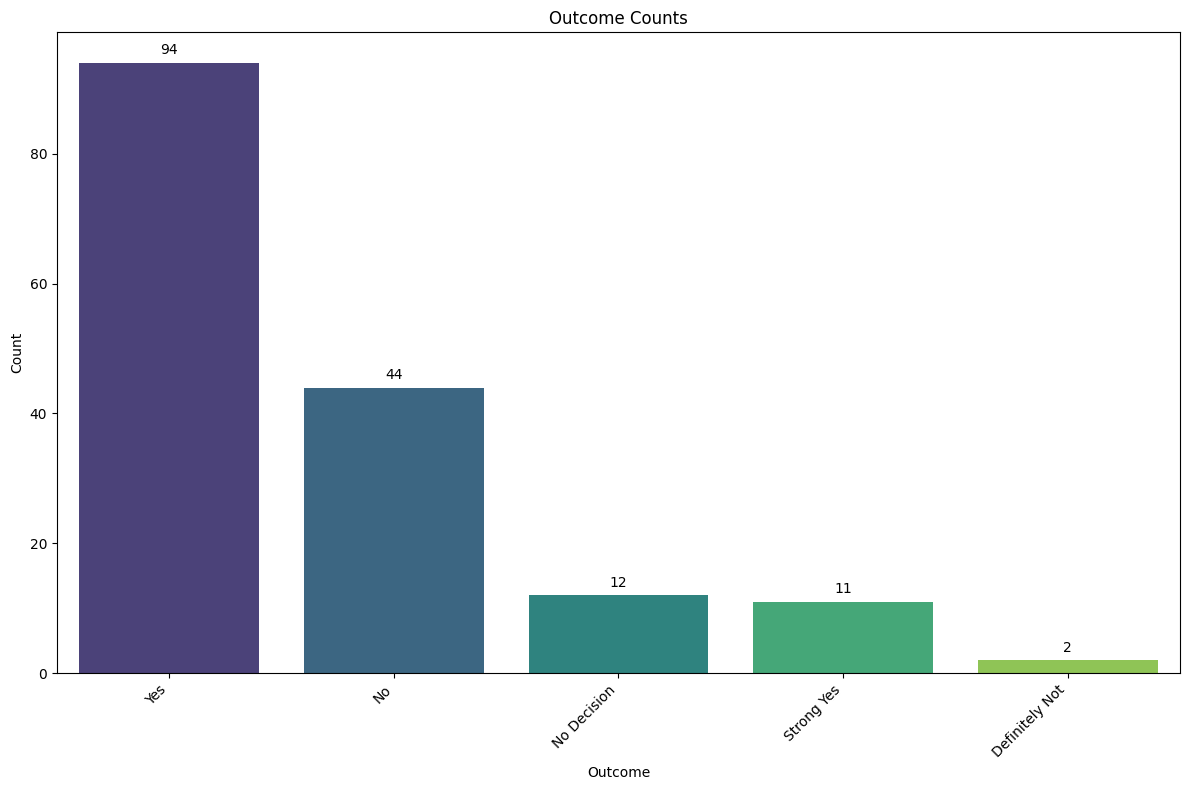

In [31]:
outcome_counts = dtq42023['Outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# Mostrar los resultados
outcome_counts
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Outcome', y='Count', data=outcome_counts, palette='viridis')
plt.title("Outcome Counts")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [16]:
# Filtrar los datos para incluir solo los Outcomes 'No', 'No Decision', y 'Definitely Not'
filtered_outcomes = dtq42023[dtq42023['Outcome'].isin(['No', 'No Decision', 'Definitely Not'])]
# Agrupar por 'Interviewer' y contar las respuestas negativas
interviewer_negative_counts = filtered_outcomes.groupby('Interviewer').size().reset_index(name='Count')

# Ordenar por la cantidad de respuestas negativas en orden descendente
top_negative_interviewer = interviewer_negative_counts.sort_values(by='Count', ascending=False).iloc[0]

# Mostrar el entrevistador que más respondió con las opciones negativas
print(f"The interviewer who responded the most with 'No', 'No Decision', or 'Definitely Not' is: {top_negative_interviewer['Interviewer']} with {top_negative_interviewer['Count']} responses.")


The interviewer who responded the most with 'No', 'No Decision', or 'Definitely Not' is: Fanny Ibarra with 23 responses.


╒════╤═══════════════════════════╤═════════╕
│    │ Interviewer               │   Count │
╞════╪═══════════════════════════╪═════════╡
│  5 │ Fanny Ibarra              │      23 │
├────┼───────────────────────────┼─────────┤
│ 14 │ Sofiene Afif (Contractor) │      14 │
├────┼───────────────────────────┼─────────┤
│  1 │ Brett Vanderblock         │       3 │
├────┼───────────────────────────┼─────────┤
│ 12 │ Ryan Sellers              │       3 │
├────┼───────────────────────────┼─────────┤
│  0 │ Alan Leatherman           │       2 │
├────┼───────────────────────────┼─────────┤
│  3 │ Chelsea Hackman           │       2 │
├────┼───────────────────────────┼─────────┤
│  6 │ Jigar Panchal             │       2 │
├────┼───────────────────────────┼─────────┤
│ 10 │ Paul Roberts              │       2 │
├────┼───────────────────────────┼─────────┤
│  2 │ Carly Weinstein           │       1 │
├────┼───────────────────────────┼─────────┤
│  4 │ Eric Azoulay              │       1 │
├────┼────

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_62567/990854978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Interviewer', y='Count', data=interviewer_negative_ranking, palette='viridis')


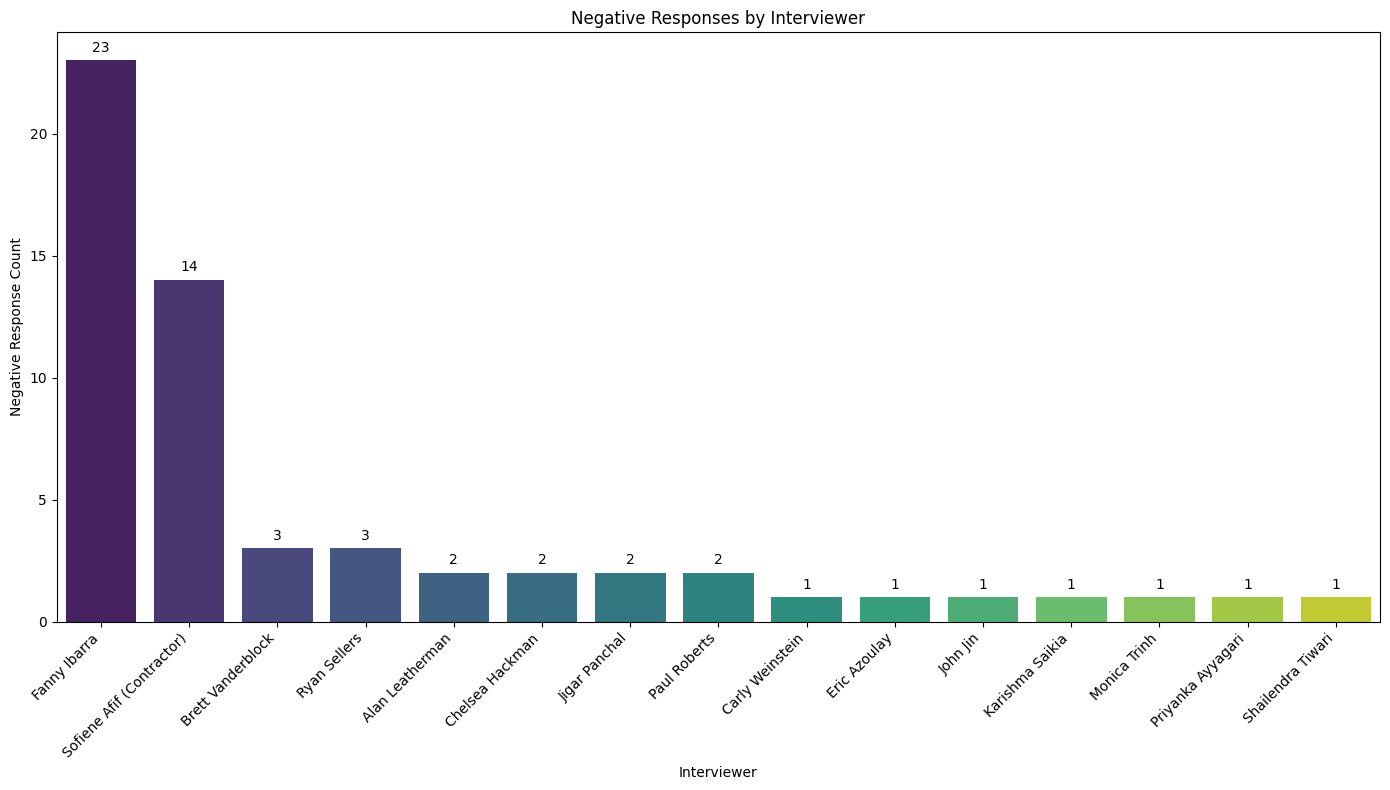

In [32]:
# Ordenar la tabla de entrevistadores con respuestas negativas de mayor a menor
interviewer_negative_ranking = interviewer_negative_counts.sort_values(by='Count', ascending=False)

# Mostrar la tabla con el ranking
from tabulate import tabulate
print(tabulate(interviewer_negative_ranking, headers='keys', tablefmt='fancy_grid'))
# Crear un gráfico de barras para visualizar la cantidad de respuestas negativas por entrevistador
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Interviewer', y='Count', data=interviewer_negative_ranking, palette='viridis')
plt.title("Negative Responses by Interviewer")
plt.xlabel("Interviewer")
plt.ylabel("Negative Response Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de respuestas negativas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()


╒════╤═══════════════════════════╤══════════════════════════╤═════════╕
│    │ Interviewer               │ Stage                    │   Count │
╞════╪═══════════════════════════╪══════════════════════════╪═════════╡
│  6 │ Fanny Ibarra              │ Recruiter Screen         │      22 │
├────┼───────────────────────────┼──────────────────────────┼─────────┤
│ 18 │ Sofiene Afif (Contractor) │ Recruiter Screen         │      12 │
├────┼───────────────────────────┼──────────────────────────┼─────────┤
│  1 │ Brett Vanderblock         │ 1st Round Interview      │       3 │
├────┼───────────────────────────┼──────────────────────────┼─────────┤
│ 17 │ Sofiene Afif (Contractor) │ Application Review       │       2 │
├────┼───────────────────────────┼──────────────────────────┼─────────┤
│ 14 │ Ryan Sellers              │ Assessment               │       2 │
├────┼───────────────────────────┼──────────────────────────┼─────────┤
│  7 │ Jigar Panchal             │ 1st Round Interview      │   

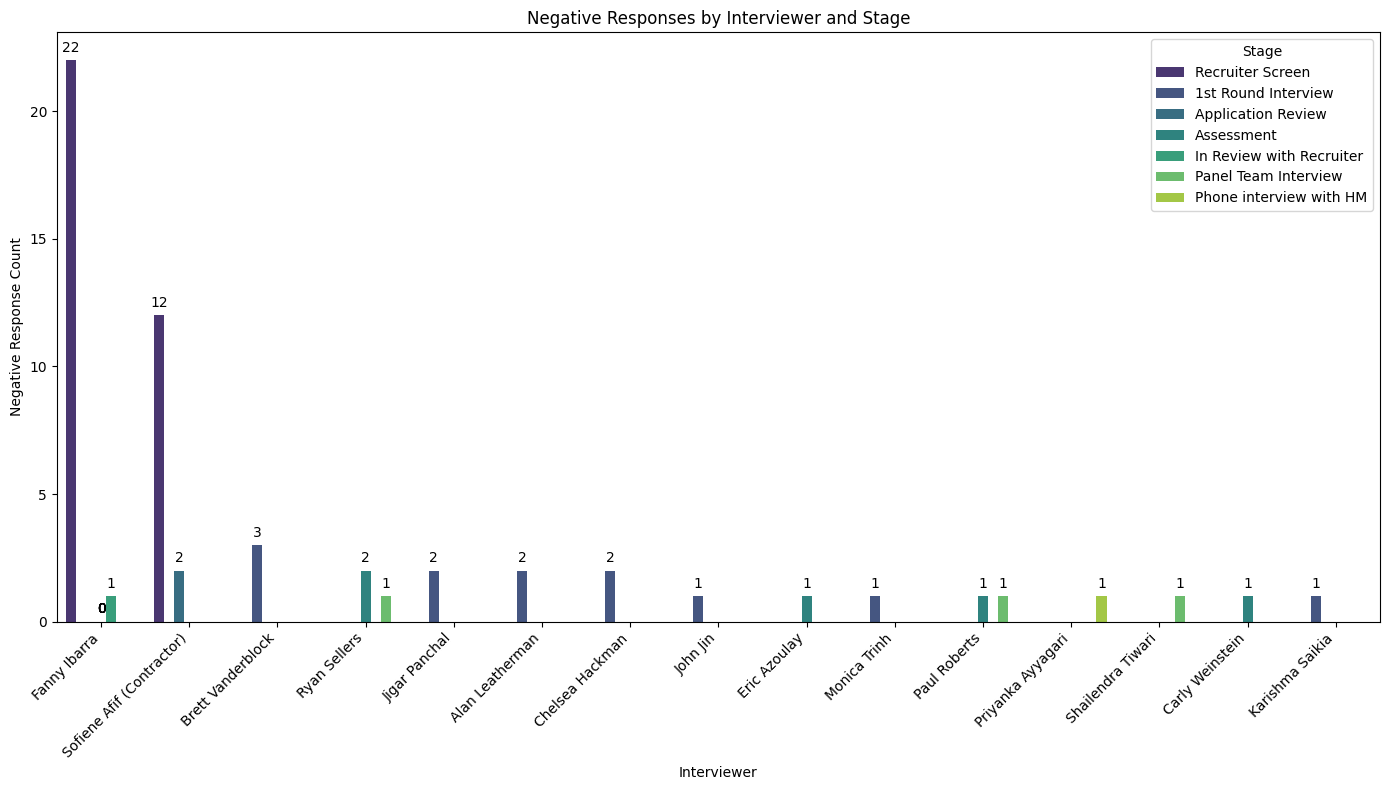

In [33]:
# Agrupar por 'Interviewer', 'Stage', y contar las respuestas negativas
interviewer_stage_negative_counts = filtered_outcomes.groupby(['Interviewer', 'Stage']).size().reset_index(name='Count')

# Ordenar por la cantidad de respuestas negativas en orden descendente
interviewer_stage_negative_ranking = interviewer_stage_negative_counts.sort_values(by='Count', ascending=False)

# Mostrar la tabla con el ranking
print(tabulate(interviewer_stage_negative_ranking, headers='keys', tablefmt='fancy_grid'))
# Crear un gráfico de barras para visualizar la cantidad de respuestas negativas por entrevistador y etapa
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Interviewer', y='Count', hue='Stage', data=interviewer_stage_negative_ranking, palette='viridis')
plt.title("Negative Responses by Interviewer and Stage")
plt.xlabel("Interviewer")
plt.ylabel("Negative Response Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de respuestas negativas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

╒════╤═══════════════════════════════════════════════════════════════╤═════════╕
│    │ Job                                                           │   Count │
╞════╪═══════════════════════════════════════════════════════════════╪═════════╡
│  4 │ Senior Software Engineer (Payments) - LATAM                   │      17 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  0 │ Senior Business Intelligence Analyst (LatAm)                  │      14 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  6 │ Senior iOS Engineer (Mobile) - LATAM                          │      10 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  1 │ Senior Data Engineer LATAM                                    │       7 │
├────┼───────────────────────────────────────────────────────────────┼─────────┤
│  2 │ Senior Data Scientist (LatAm)                                 │       6 │
├────┼──────────────────────

/var/folders/5n/nhlty2pd5q96xfw8z_1stsnm0000gn/T/ipykernel_62567/3082796864.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Job', y='Count', data=job_negative_counts_sorted, palette='viridis')


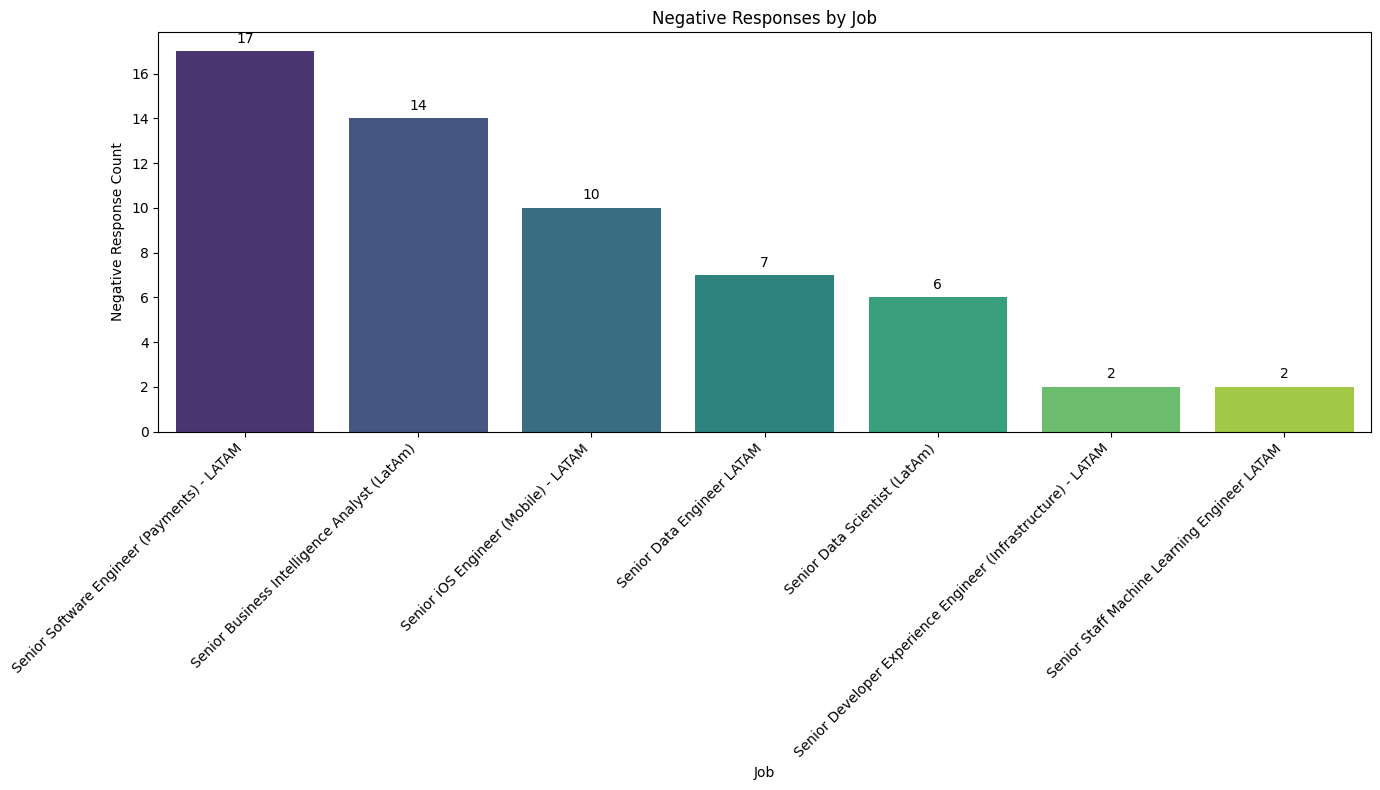

In [34]:
# Agrupar por 'Job' y contar las respuestas negativas
job_negative_counts = filtered_outcomes.groupby('Job').size().reset_index(name='Count')

# Ordenar por la cantidad de respuestas negativas en orden descendente
job_negative_counts_sorted = job_negative_counts.sort_values(by='Count', ascending=False)

# Mostrar la tabla con los resultados
print(tabulate(job_negative_counts_sorted, headers='keys', tablefmt='fancy_grid'))
# Crear un gráfico de barras para visualizar la cantidad de respuestas negativas por trabajo
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Job', y='Count', data=job_negative_counts_sorted, palette='viridis')
plt.title("Negative Responses by Job")
plt.xlabel("Job")
plt.ylabel("Negative Response Count")
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con la cantidad exacta de respuestas negativas
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()